In [511]:
# Importera nödvändiga bibliotek
import sqlite3  # För att interagera med SQLite-databaser
import pandas as pd  # För datahantering och analys
import matplotlib.pyplot as plt  # För datavisualisering

In [531]:
try:
    conn = sqlite3.connect('Köksglädje.db')
    query = "SELECT CategoryName, Price FROM Products"
    products_df = pd.read_sql(query, conn)
    print("\nDataFrame efter inläsning från databasen:")
    print(products_df.head().to_string())  
except sqlite3.Error as e:
    print(f"Ett fel uppstod vid anslutning till databasen: {e}")
    products_df = pd.DataFrame()  
finally:
    if conn:
        conn.close()


DataFrame efter inläsning från databasen:
  CategoryName   Price
0   Köksknivar   999.0
1   Köksknivar   749.0
2   Köksknivar  1199.0
3   Köksknivar   299.0
4   Köksknivar   499.0


In [529]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
with sqlite3.connect('Köksglädje.db') as conn:
    tables = pd.read_sql(query, conn)

print("\nLista över tabeller i databasen:")
print(tables)



Lista över tabeller i databasen:
                 name
0           Customers
1              Stores
2  TransactionDetails
3            Products
4        Transactions
5     sqlite_sequence
6           Employees


In [532]:
with sqlite3.connect('Köksglädje.db') as conn:
    customers_df = pd.read_sql("SELECT * FROM Customers;", conn)
    products_df = pd.read_sql("SELECT * FROM Products;", conn)
    stores_df = pd.read_sql("SELECT * FROM Stores;", conn)
    transactions_df = pd.read_sql("SELECT * FROM Transactions;", conn)
    details_df = pd.read_sql("SELECT * FROM TransactionDetails;", conn)

print("\nData från tabellerna läst in framgångsrikt!")



Data från tabellerna läst in framgångsrikt!


In [533]:
print("Customers columns:", customers_df.columns)
print("Products columns:", products_df.columns)
print("Stores columns:", stores_df.columns)
print("Transactions columns:", transactions_df.columns)
print("TransactionDetails columns:", details_df.columns)


Customers columns: Index(['CustomerID', 'JoinDate', 'ActiveMember', 'ApprovedToContact'], dtype='object')
Products columns: Index(['ProductID', 'ProductName', 'Description', 'CategoryName', 'Price',
       'CostPrice', 'SupplierID'],
      dtype='object')
Stores columns: Index(['StoreID', 'StoreName', 'Location'], dtype='object')
Transactions columns: Index(['TransactionID', 'StoreID', 'CustomerID', 'TransactionDate'], dtype='object')
TransactionDetails columns: Index(['TransactionDetailID', 'TransactionID', 'ProductID', 'Quantity',
       'PriceAtPurchase', 'TotalPrice'],
      dtype='object')


In [502]:
# Läs in data från tabellerna
customers_df = pd.read_sql("SELECT * FROM Customers;", conn)
products_df = pd.read_sql("SELECT * FROM Products;", conn)
stores_df = pd.read_sql("SELECT * FROM Stores;", conn)
transactions_df = pd.read_sql("SELECT * FROM Transactions;", conn)
details_df = pd.read_sql("SELECT * FROM TransactionDetails;", conn)

# Stäng anslutningen
conn.close()

# Skriva ut dataramarna för kontroll
print("\nKunder:")  
print(customers_df.head())  
print("\nProdukter:")  
print(products_df.head())  
print("\nButiker:")  
print(stores_df.head())  
print("\nTransaktioner:")  
print(transactions_df.head())
print("\nTransaktionsdetaljer:")
print(details_df.head())


Kunder:
   CustomerID    JoinDate  ActiveMember  ApprovedToContact
0           1  2021-11-24           1.0                1.0
1           2  2021-05-09           1.0                1.0
2           3  2022-02-04           1.0                1.0
3           4  2021-05-16           1.0                1.0
4           5  2021-09-16           1.0                1.0

Produkter:
   ProductID   ProductName                        Description CategoryName  \
0          1      Kockkniv                     Kockkniv 18 cm   Köksknivar   
1          2      Brödkniv     Brödkniv med tandat blad 22 cm   Köksknivar   
2          3   Santokukniv          Japansk Santokukniv 17 cm   Köksknivar   
3          4      Skalkniv               Liten skalkniv 10 cm   Köksknivar   
4          5  Grönsakskniv  Grönsakskniv med brett blad 15 cm   Köksknivar   

    Price  CostPrice SupplierID  
0   999.0      620.0       None  
1   749.0      450.0       None  
2  1199.0      800.0       None  
3   299.0      150.0

In [540]:
def classify_price(price):
    """
    Klassificerar priser i Products-tabellen som 'Dyr' eller 'Billig'.
    
    :param price: Priset som ska klassificeras
    :return: 'Dyr' om priset är över 500, annars 'Billig'
    """
    return "Dyr" if price > 500 else "Billig"

products_df['PriceCategory'] = products_df['Price'].apply(classify_price)
print(products_df[['ProductName', 'Price', 'PriceCategory']].head())

    ProductName   Price PriceCategory
0      Kockkniv   999.0           Dyr
1      Brödkniv   749.0           Dyr
2   Santokukniv  1199.0           Dyr
3      Skalkniv   299.0        Billig
4  Grönsakskniv   499.0        Billig


In [535]:
def insert_employees_data(cursor):
    cursor.execute("SELECT COUNT(*) FROM Employees;")
    count = cursor.fetchone()[0]
    
    if count == 0:  
        cursor.executescript("""
            INSERT INTO Employees (Name, Position, StoreID, HireDate) VALUES 
            ('Anna Svensson', 'Butikschef', 1, '2023-02-15'),
            ('Johan Karlsson', 'Säljare', 2, '2022-06-10'),
            ('Emma Lind', 'Kassör', 1, '2024-01-05');
        """)

In [508]:
# Beräkna total försäljning
conn = sqlite3.connect('Köksglädje.db')
query_total_sales = "SELECT SUM(TotalPrice) as TotalSales FROM TransactionDetails;"
total_sales_df = pd.read_sql(query_total_sales, conn)
conn.close()
print(f"\nTotal försäljning: {total_sales_df.iloc[0]['TotalSales']} SEK")


Total försäljning: 2233410.0 SEK


In [509]:
# Hämta de mest sålda produkterna
conn = sqlite3.connect('Köksglädje.db')
query_best_selling = """
SELECT p.ProductName, SUM(td.Quantity) as TotalSold
FROM TransactionDetails td
JOIN Products p ON td.ProductID = p.ProductID
GROUP BY p.ProductName
ORDER BY TotalSold DESC
LIMIT 10;
"""
best_selling_df = pd.read_sql(query_best_selling, conn)
conn.close()

print("\nMest sålda produkter:")
print(best_selling_df)


Mest sålda produkter:
   ProductName  TotalSold
0      Måttset        116
1     Durkslag        112
2         Slev        110
3      Matlåda        110
4   Termometer        104
5         Visp        100
6     Skalkniv         99
7  Matberedare         93
8  Kryddburkar         92
9     Bakmatta         92


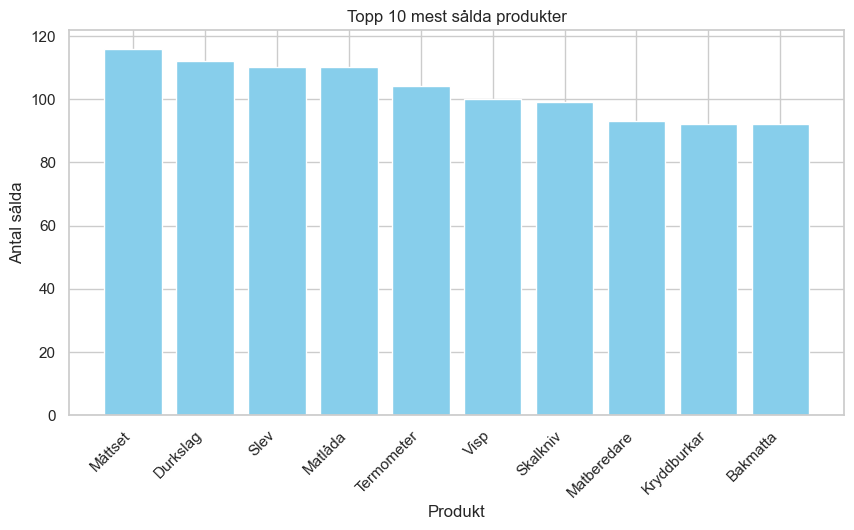

In [510]:
# Skapa en visualisering av de mest sålda produkterna
plt.figure(figsize=(10, 5))
plt.bar(best_selling_df['ProductName'], best_selling_df['TotalSold'], color='skyblue')
plt.xlabel("Produkt")
plt.ylabel("Antal sålda")
plt.title("Topp 10 mest sålda produkter")
plt.xticks(rotation=45, ha='right')
plt.show()

In [458]:
# Rensa data (t.ex. ta bort null-värden)
products_df.dropna(inplace=True)

# Beräkna medelpris per kategori
category_avg_price = products_df.groupby("CategoryName")["Price"].mean().reset_index()

# Visa de transformerade datan för att kontrollera resultatet
print("\nDataFrame efter rensning och gruppering:")
print(category_avg_price.head())


DataFrame efter rensning och gruppering:
Empty DataFrame
Columns: [CategoryName, Price]
Index: []


In [459]:
query = """
SELECT ProductName, Price FROM Products 
WHERE Price > 1000;
"""
products_df = pd.read_sql(query, conn)
print(products_df)


     ProductName   Price
0    Santokukniv  1199.0
1    Matberedare  1599.0
2  Köksassistent  4999.0
3        Blender  1399.0
4      Stekgryta  1499.0
5    Tryckkokare  1899.0
6      Soppgryta  1199.0
7      Sous Vide  1299.0


In [ ]:
query = """ 
SELECT ProductName, Price FROM Products WHERE Price > 500;""" 

products_over_500 = pd.read_sql(query, conn) 
products_over_500

,ProductName,Price
0,Kockkniv,999.0
1,Brödkniv,749.0
2,Santokukniv,1199.0
3,Matberedare,1599.0
4,Köksassistent,4999.0
5,Stavmixer,699.0
6,Blender,1399.0
7,Kaffebryggare,899.0
8,Stekgryta,1499.0
9,Kastrull,699.0


In [ ]:
query = """  
SELECT CategoryName, COUNT(*) AS ProductCount  
FROM Products  
GROUP BY CategoryName;  
"""  
categories_df = pd.read_sql_query(query, conn)
categories_df

,CategoryName,ProductCount
0,Bakredskap,5
1,Förvaring,5
2,Grytor/Kastruller,5
3,Köksknivar,5
4,Köksmaskiner,8
5,Köksredskap,6
6,Stekpannor,5
7,Övrigt,1


In [462]:
query = """
SELECT ProductName, Price
FROM Products
WHERE Price > ?;
"""
price_limit = 1000

with sqlite3.connect('Köksglädje.db') as connection:
    products_df = pd.read_sql_query(query, connection, params=(price_limit,))

# Visa datan i tabellformat
print("Produkter med pris över 1000 kr:")
print(products_df)


Produkter med pris över 1000 kr:
     ProductName   Price
0    Santokukniv  1199.0
1    Matberedare  1599.0
2  Köksassistent  4999.0
3        Blender  1399.0
4      Stekgryta  1499.0
5    Tryckkokare  1899.0
6      Soppgryta  1199.0
7      Sous Vide  1299.0


In [463]:
query = """
SELECT CategoryName, COUNT(*) AS ProductCount
FROM Products
GROUP BY CategoryName
ORDER BY ProductCount DESC;
"""

with sqlite3.connect('Köksglädje.db') as connection:
    categories_df = pd.read_sql_query(query, connection)

# Beräkna totalen och lägg till en kolumn för andelar
categories_df['Percentage'] = (categories_df['ProductCount'] / categories_df['ProductCount'].sum()) * 100
print("Antal produkter per kategori:")
print(categories_df)

Antal produkter per kategori:
        CategoryName  ProductCount  Percentage
0       Köksmaskiner             8        20.0
1        Köksredskap             6        15.0
2         Stekpannor             5        12.5
3         Köksknivar             5        12.5
4  Grytor/Kastruller             5        12.5
5          Förvaring             5        12.5
6         Bakredskap             5        12.5
7             Övrigt             1         2.5


In [542]:
query = """  
SELECT S.StoreName, COUNT(T.TransactionID) AS TransactionCount  
FROM Transactions T  
JOIN Stores S ON T.StoreID = S.StoreID  
GROUP BY S.StoreName;  
"""  

try:  

    conn = sqlite3.connect('Köksglädje.db')
    stores_df = pd.read_sql(query, conn)  
    print("\nAntal transaktioner per butik:")
    print(stores_df)  
except Exception as e:  
    print(f"Fel vid läsning av data: {e}")
finally:
    if conn:
        conn.close()



Antal transaktioner per butik:
                      StoreName  TransactionCount
0  Grytor & Stekpannor Göteborg               112
1         Köksbutiken Stockholm               129
2            Köksproffset Malmö                74
3          Köksredskap Göteborg               102
4              Malmö Gourmetkök                81
5    Matlagningshörnan Göteborg                96
6   Matlagningshörnan Stockholm               138
7             Stockholm Gourmet               137
8     Stockholms Knivspecialist               131


In [464]:
# Kontrollera om en Stores-tabell finns för att få StoreName  
query = """  
SELECT S.StoreName, COUNT(T.TransactionID) AS TransactionCount  
FROM Transactions T  
JOIN Stores S ON T.StoreID = S.StoreID  
GROUP BY S.StoreName;  
"""  

try:  
    # Exekvera SQL-frågan  
    stores_df = pd.read_sql(stores_query, connection)  
    print("\nAntal transaktioner per butik:")  
    print(stores_df)  
except Exception as e:  
    print(f"Fel vid läsning av data: {e}")


Antal transaktioner per butik:
   StoreID                     StoreName   Location
0        1         Köksbutiken Stockholm  Stockholm
1        2     Stockholms Knivspecialist  Stockholm
2        3   Matlagningshörnan Stockholm  Stockholm
3        4             Stockholm Gourmet  Stockholm
4        5    Matlagningshörnan Göteborg   Göteborg
5        6  Grytor & Stekpannor Göteborg   Göteborg
6        7          Köksredskap Göteborg   Göteborg
7        8            Köksproffset Malmö      Malmö
8        9              Malmö Gourmetkök      Malmö


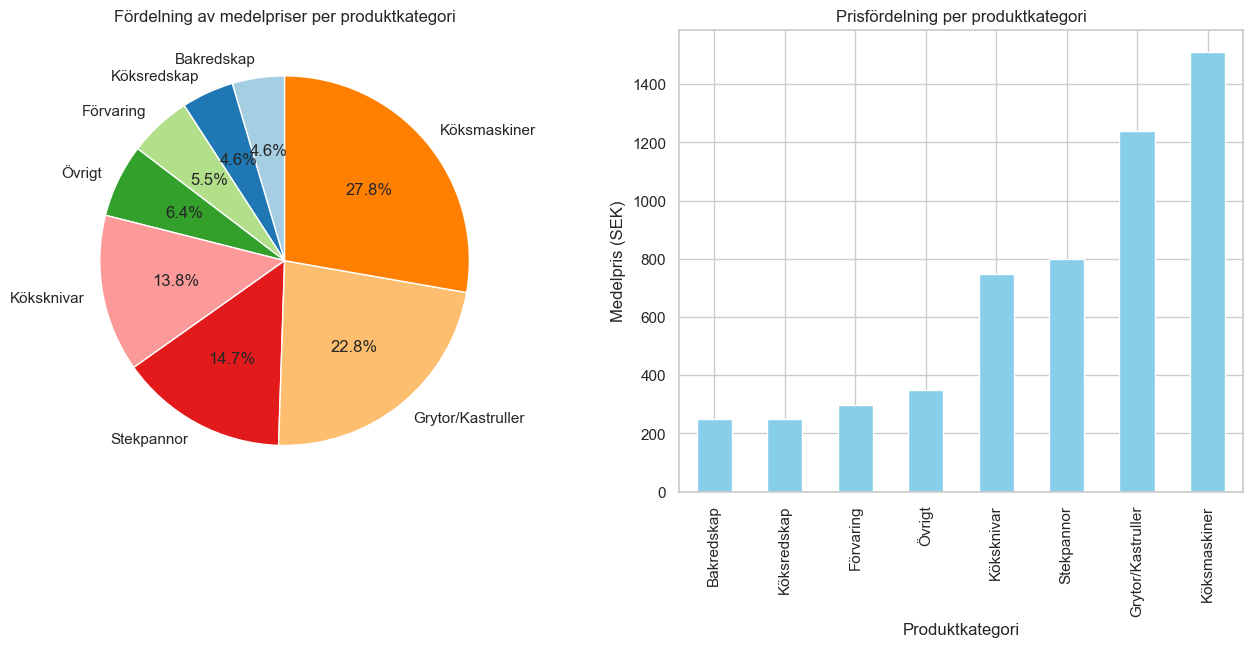

In [ ]:
import matplotlib.pyplot as plt

# Beräkna medelpriset per kategori
category_avg_price = details_df.groupby("CategoryName")["Price"].mean().sort_values()

# Skapa en figur med två subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Cirkeldiagram för medelpriser per kategori
ax1.pie(category_avg_price, labels=category_avg_price.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax1.set_title("Fördelning av medelpriser per produktkategori")

# Stapeldiagram för prisfördelning per kategori
category_avg_price.plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title("Prisfördelning per produktkategori")
ax2.set_xlabel("Produktkategori")
ax2.set_ylabel("Medelpris (SEK)")

plt.show()


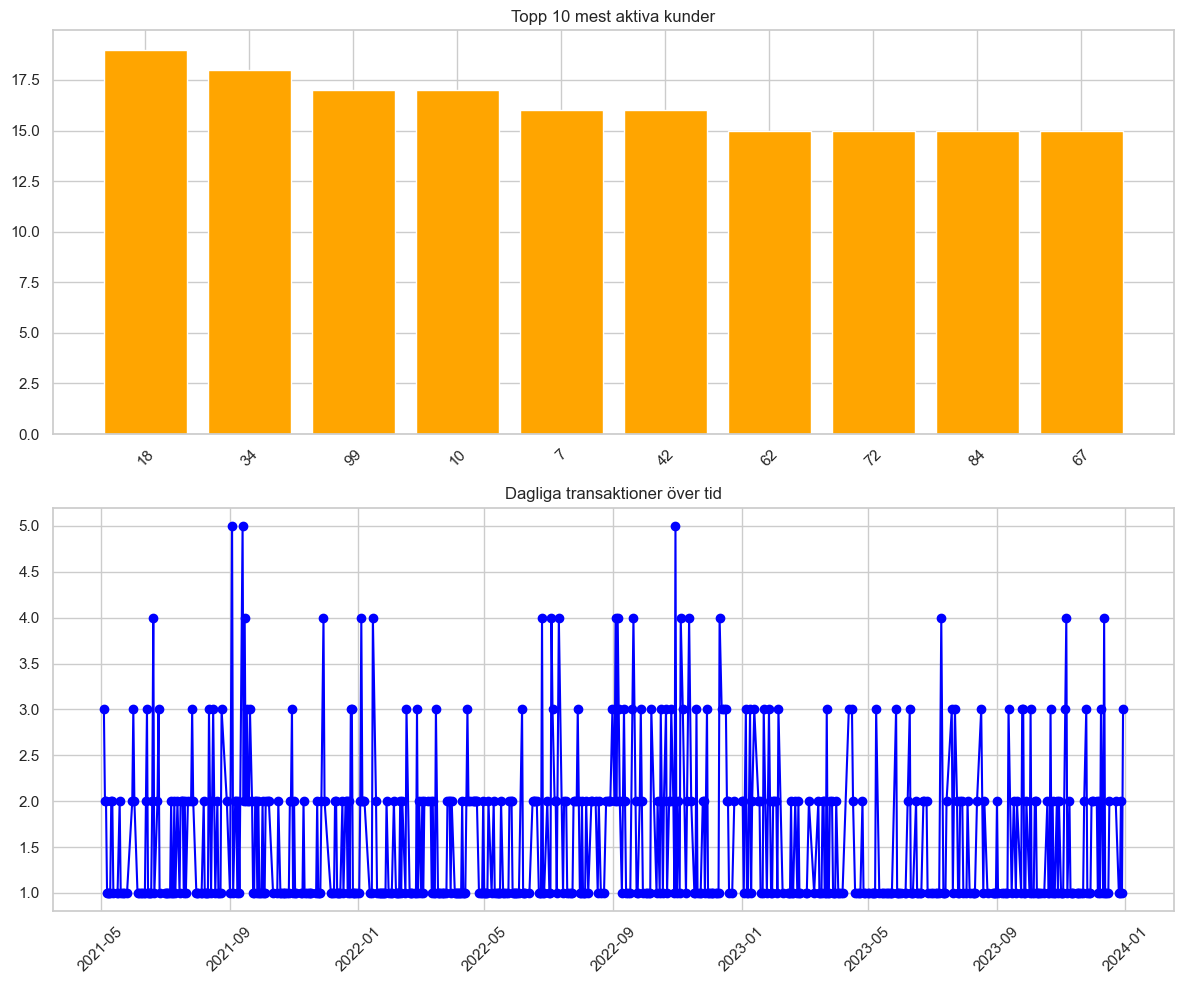

In [547]:
import matplotlib.pyplot as plt
import pandas as pd

# Konvertera TransactionDate till datetime-format
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Räkna transaktioner per kund och ta topp 10
top_customers = transactions_df['CustomerID'].value_counts().head(10)

# Gruppér transaktioner per dag
daily_transactions = transactions_df.groupby(transactions_df['TransactionDate'].dt.date).size()

# Skapa subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Stapeldiagram för topp 10 kunder
axs[0].bar(top_customers.index.astype(str), top_customers.values, color='orange')
axs[0].set_title('Topp 10 mest aktiva kunder')
axs[0].tick_params(axis='x', rotation=45)

# Linjediagram för dagliga transaktioner
axs[1].plot(daily_transactions.index, daily_transactions.values, marker='o', color='blue')
axs[1].set_title('Dagliga transaktioner över tid')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)

# Visa diagrammen
plt.tight_layout()
plt.show()


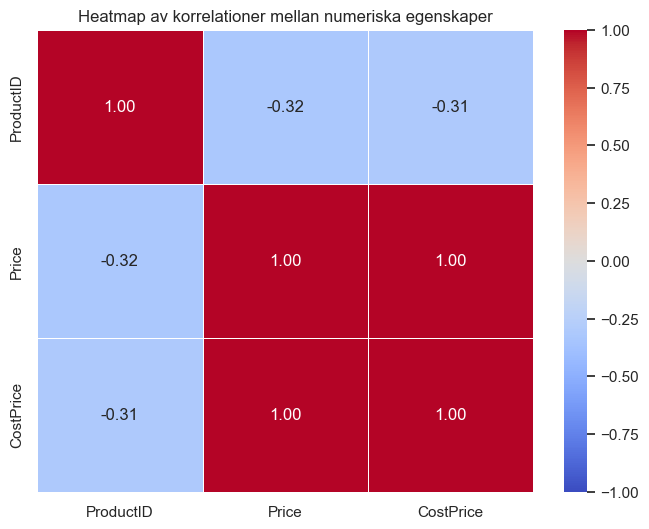

In [558]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Anslut till databasen
db_path = 'Köksglädje.db'  # Ange rätt sökväg om den är annorlunda
conn = sqlite3.connect(db_path)

# Hämta alla data från tabellen (ändra tabellnamn om det är annorlunda)
query = "SELECT * FROM products"  # Hämta alla kolumner från tabellen
products_df = pd.read_sql_query(query, conn)

# Stäng anslutningen till databasen
conn.close()

# Hämta endast de numeriska kolumnerna för att beräkna korrelation
numerical_data = products_df.select_dtypes(include=['float64', 'int64'])

# Beräkna korrelationsmatrisen
corr = numerical_data.corr()

# Skapa en heatmap
plt.figure(figsize=(8, 6))  # Ange storlek på diagrammet
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)

# Lägg till titel
plt.title('Heatmap av korrelationer mellan numeriska egenskaper')

# Visa diagrammet
plt.show()
